#Task 3: Predicting Insurance Claim Amounts
**Dataset:**
Medical Cost Personal Dataset



##1. Introduction & Problem Statement

**Introduction**

Medical insurance companies must accurately estimate insurance claim amounts to manage financial risk, design premium structures, and ensure fairness for policyholders. Medical costs vary significantly depending on personal, demographic, and lifestyle-related factors.

**Problem Statement**

The task is to build a machine learning regression model that can predict medical insurance claim amounts (charges) using personal attributes such as age, BMI, gender, smoking status, and region.

**Objective**

The objective of this task is to predict medical insurance charges using a Linear Regression model and analyze how factors like age, BMI, and smoking status influence insurance costs.

##2. Dataset Understanding & Description

**Dataset Name:** Medical Cost Personal Dataset

**Dataset Description**

The dataset contains personal and demographic information of individuals along with their medical insurance charges. Each row represents one individual.

**Dataset Features**

- age: Age of the individual

- sex: Gender (male/female)

- bmi: Body Mass Index

- children: Number of children covered by insurance

- smoker: Smoking status (yes/no)

- region: Residential region in the US

- charges: Medical insurance cost (target variable)

###Step 1: Import Required Libraries

In this step, all necessary Python libraries are imported. These libraries are used for data handling, visualization, model training, and performance evaluation.

In [1]:
# Data Handling Library
import pandas as pd
import numpy as np

# Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model trainig and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

##Step 2: Load the Dataset

The Medical Cost Personal Dataset is loaded using pandas. This dataset contains personal information along with insurance charges.

In [2]:
from google.colab import files
files.upload() # Upload the insurance.csv

data = pd.read_csv("insurance.csv")
data.head()

Saving insurance.csv to insurance.csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##3. Data Cleaning & Preparation

Categorical variables such as gender and smoking status are converted into numerical values so that they can be used in the Linear Regression model.
###Step 3: Encoding Categorical Variables

In [3]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data = pd.get_dummies(data, drop_first=True)

**Data Quality Check**

In [4]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
charges,0
region_northwest,0
region_southeast,0
region_southwest,0


**Observation:**

The dataset contains no missing values and is ready for modeling.

##4. Exploratory Data Analysis (EDA)

EDA helps understand relationships between features and insurance charges.
###Step 4: Visualization of Key Features

**Age vs Insurance Charges**

This visualization shows how insurance charges change with age.

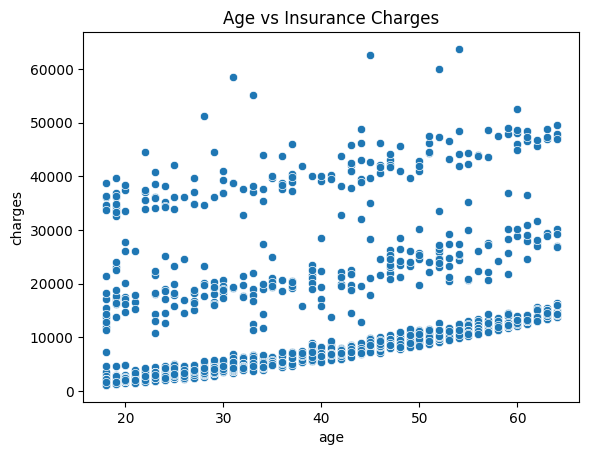

In [5]:
sns.scatterplot(x='age', y='charges', data=data)
plt.title("Age vs Insurance Charges")
plt.show()

**Insight:**
Insurance charges generally increase with age.

**BMI vs Insurance Charges**

This graph helps analyze the relationship between BMI and insurance charges.

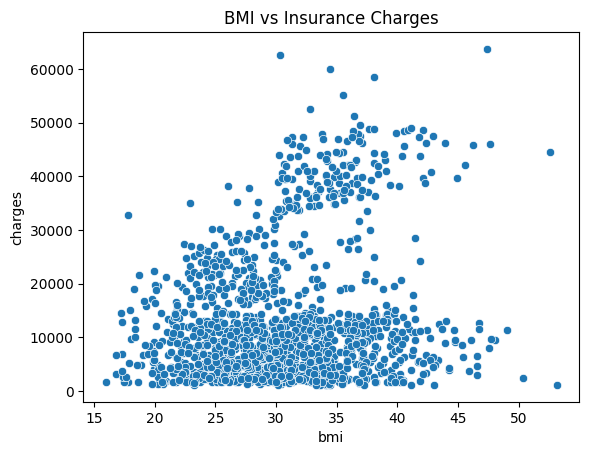

In [6]:
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title("BMI vs Insurance Charges")
plt.show()

**Insight:**
Higher BMI values are associated with higher medical costs.

**Smoking Status vs Insurance Charges**

This plot compares insurance charges between smokers and non-smokers.

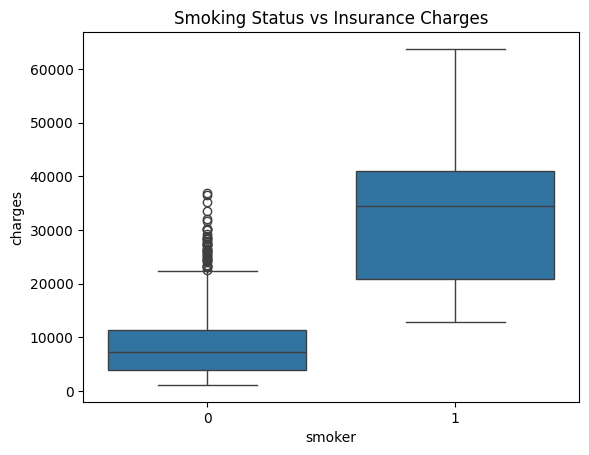

In [7]:
sns.boxplot(x='smoker', y='charges', data=data)
plt.title("Smoking Status vs Insurance Charges")
plt.show()

**Insight:**
Smokers incur significantly higher insurance charges than non-smokers.

###Step 5: Feature Selection and Target Variable

The dataset is divided into independent variables (features) and the dependent variable (target).
- Independent Variables (X): Personal attributes

- Dependent Variable (y): Insurance charges

In [8]:
X = data.drop('charges', axis=1)
y = data['charges']

###Step 6: Split Dataset into Training and Testing Sets

The dataset is split into training and testing data to evaluate the model’s performance on unseen data.
- 80% Training Data

- 20% Testing Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Step 7: Train the Linear Regression Model

A Linear Regression model is trained using the training dataset.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Step 8: Predict Insurance Charges

The trained model is used to predict insurance charges for the test dataset.

In [11]:
y_pred = model.predict(X_test)

###Step 9: Model Evaluation using MAE and RMSE

The model’s performance is evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 4181.194473753645
Root Mean Squared Error (RMSE): 5796.284659276271


**Evaluation Interpretation**

- MAE shows the average absolute prediction error

- RMSE penalizes larger errors more heavily

- Lower values indicate better model performance

#Conclusion & Key Insights
##Key Insights

- Age and BMI have a positive correlation with insurance charges

- Smoking status is the most influential factor in increasing claim amounts

- Linear Regression provides reasonable predictions for insurance costs

##Conclusion

The Linear Regression model successfully estimates medical insurance claim amounts using personal data. The evaluation metrics (MAE and RMSE) indicate that the model performs adequately for this regression task. Further improvements could include feature scaling, advanced regression models, or regularization techniques.